# 1.BUSINESS UNDERSTANDING

"A wine manufacturing company wants to automate its quality control process to help in reducing manual errors and increase consistency in wine grading in terms of quality. They aim to develop a predictive model that classifies wines into 'high quality' or 'low quality' sections based on provided features and chemical properties to optimize production, marketing and pricing strategies."


1. Identify the all the main chemical properties that influence wine quality.

2. Build a classification model to categorize wine into quality labels (0:low or 1:high)


3. Determine the role wine type (in red or white) plays in wine quality.

4. Compare different model performances

# 2.DATA UNDERSTANDING

In [807]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,roc_auc_score, roc_curve, auc

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [756]:
# Load the dataset
def load_Dataset(path):
  df = pd.read_csv(path)
  return df

# Load the dataset and display the first five columns
df = load_Dataset('Data/wine-quality-white-and-red.csv')
# df = load_Dataset('Data/winequality-red.csv')

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [757]:
# Check the number of rows and columns
df.shape

(6497, 13)

In [758]:
# Checking the ydescriptioon to understand the data more
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


- The average of fixed acidity is `7.21`, the highest is `15.9`
- The average of volatile acidity is `0.34`, the highest is `1.58`
- The average of citric acid is` 0.32`, the highest is `1.66`
- The average of residual sugar is `5.44`, the highest is `65.8`
- The average of chlorides is `0.06`, the highest is `0.61`
- The average of free sulfur dioxide is `30.52`, the highest is `289`
- The average of total sulfur dioxide is `115.74`, the highest is `440`
- The average of density is `0.99`, the highest is `1.o4`
- The average of pH is `3.21`, the highest is `4.01`
- The average of sulphates is `0.53`, the highest is `2`
- The average of alcohol is `10.49`, the highest is `14.90`
- The average of quality is `5.81`, the highest value is `9`

In [759]:
# Check more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


This shows us that our dataset has no null values.

# 3.DATA PREPARATION

## 3.1 Handling Missing Values

In [760]:
# Chcek for missing values
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We do not have any missing values in this dataset

## 3.2 Encode to Binary

In [761]:
# Convert wine type to binary
df['is red'] = (df['type'] == 'red').astype(int)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 3.4 Adding Important Columns

In [762]:
# Add quality labels in categories
def qualityLabel(qual):
  if qual <= 6:
    return 'low'
  else:
    return 'high'

df['quality label'] = df['quality'].apply(qualityLabel)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,quality label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,low
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,low
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,low
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low


Created a new column `quality label` that classifies the quality in to `low, medium` and `high` quality

In [763]:
# Create an encoding of the quality label (target)
df['quality label encoded'] = df['quality label'].map({'low': 0, 'high': 1})
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,quality label,quality label encoded
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,low,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,low,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,low,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low,0


Create binary column for the quality label

In [764]:
# Create new Features
df['sugar/acidity'] = df['residual sugar'] / (df['volatile acidity'] + 1e-5)
df['sulphates ratio'] = df['sulphates'] / (df['chlorides'] + 1e-5)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is red,quality label,quality label encoded,sugar/acidity,sulphates ratio
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,low,0,76.663827,9.997778
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,low,0,5.333156,9.997960
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,low,0,24.641977,8.798240
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low,0,36.954915,6.895363
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,low,0,36.954915,6.895363


This is to create new columns that we will be using in our modelling.

## 3.5 Explanatory Data Analysis
### 3.5.1 Understand dostribution between Wine quality and Type

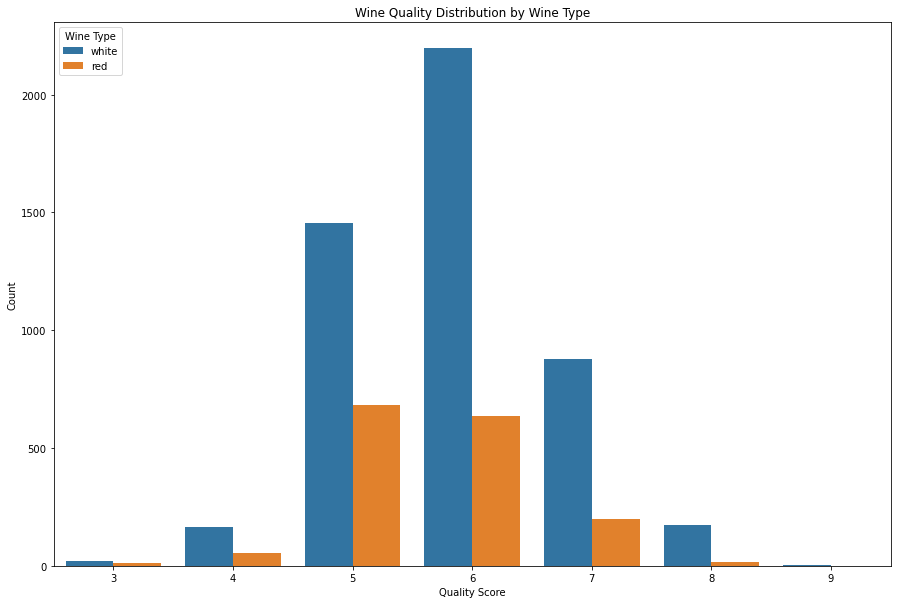

In [765]:
plt.figure(figsize=(15, 10))
sns.countplot(x='quality', hue='type', data=df)
plt.title('Wine Quality Distribution by Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

- The output shows that most wines are rated 5 and 6 showning that the medium quality wines ast average dominate.This shows the dataset is imbalanced as most wines fall under the moderate category.
- Very few wines in low quality and high quality wines
- The Data is imbalanced so we will consider alternative solutions like Resampling and class weights

### 3.5.2 Correlation heatmap between the numerical features in the dataset

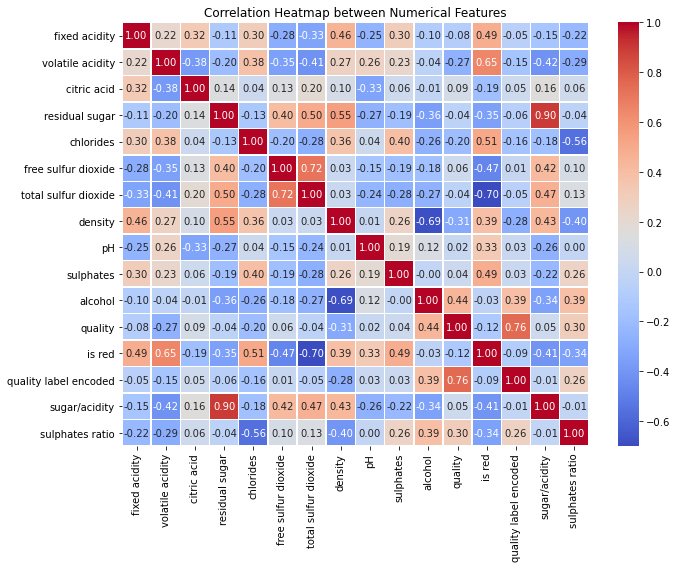

In [766]:
numericalCols = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,8))
sns.heatmap(numericalCols.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Features')
plt.tight_layout()
plt.show()

Correlation coeffficients range from `-1` to `1` where:
`+1` strong positive correlation(an increase in one leads to an increase in the other)
`-1` strong negative correlation(as one increases the other decreases)
`0` There is no correlation

Our main concern is how features relate to `quality`.

From the matrx above we conclude the features with the highest correlation to qualitya are `alcohol` with `0.44`(positive correlation) and `volatile acidity` with `-0.27` (negative correlation)

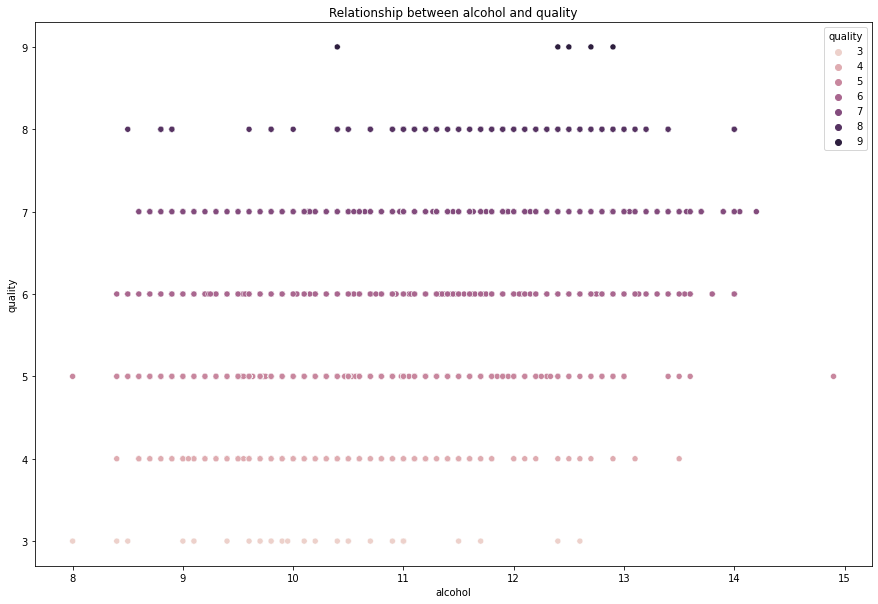

In [767]:
## Check relationship between quality and the 4 best features we have seen from the matrix

ig= plt.subplots(1,figsize=(15, 10))

sns.scatterplot(x = "alcohol",y = "quality", hue = "quality",data = df).set(title = "Relationship between alcohol and quality");

The image shows the relationshib between quality and alcohol(strongest correlation)

- Wines with higher alcohol tent to receive higher quality rates
- quality levels at 5,6,7 are the most frequent

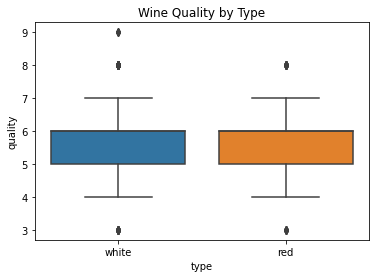

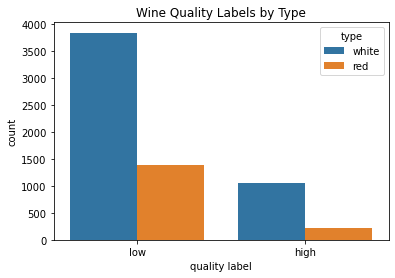

In [768]:
# Compare red vs white average target
sns.boxplot(data=df, x='type', y='quality')
plt.title('Wine Quality by Type')
plt.show()

# Count of quality labels by type
sns.countplot(data=df, x='quality label', hue='type')
plt.title('Wine Quality Labels by Type')
plt.show()

The first diagram shows us that:
- Maximun wine count ranges at around 5 and 6 ..Clarifies that wine color does not affect the quality as they have their means around the same point.
- Visible that white tends to have more outliers with very high quality.

The second diagram:
- Lower wines that are <7 are produces more as they have a higher count at both low and high levels than the high quality wines
- More white wines are produced than red wines.

# 4.MODELING

## 4.1  Regression

### 4.1.1 Multi Linear Regression

In [769]:
# Chack all the columns we have to point out which to drop
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'is red', 'quality label', 'quality label encoded',
       'sugar/acidity', 'sulphates ratio'],
      dtype='object')

In [770]:
# Select the independet variables as X
X = df.drop(['type','quality', 'quality label','quality label encoded'], axis = 1)
y = df['quality']

# Here we are printing out to see total unique values of y yo ensure we are not using binary data in linear regression
print(y.unique())
print(y.value_counts())


# Split the Dataset into Training and testing set(80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True,random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))

[6 5 7 8 4 3 9]
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     153.7
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        05:16:46   Log-Likelihood:                -5807.4
No. Observations:                5197   AIC:                         1.164e+04
Df Residuals:                    5182   BIC:                         1.174e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------

About 63% of variation quality is explained by the 14 predivtors

F statistics of the model =163.3 and p< 0.001 making the model statistically significant as atleast one feature is significantly related to quality

most significant cols are
` 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol','volatile acidity'
    'sugar/acidity' `

In [790]:
features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
    'sugar/acidity', 'sulphates ratio','is red'
]

# Assume df is our full dataset
X = df[features].copy()
# Add intercept for VIF calculation
X = add_constant(X)  

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values("VIF", ascending=False)


,feature,VIF
0,const,2.493351e+06
8,density,2.313670e+01
4,residual sugar,1.759993e+01
12,sugar/acidity,8.409603e+00
14,is red,7.665599e+00
11,alcohol,5.742454e+00
1,fixed acidity,5.079287e+00
7,total sulfur dioxide,4.126365e+00
13,sulphates ratio,3.644999e+00
10,sulphates,3.408448e+00


Ahigh VIF indicates level of collinearity >10

Best columns according to our VFI are `'fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol','sulphates ratio'
    `

In [772]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred,squared = False)

print(f'\nRoot Mean Squared Error for Baseline Model: {rmse:.2f}')


Root Mean Squared Error for Baseline Model: 0.69


The RMSE shows us that, on average, our model is getting the value of Y wrong by 0.69 units.'

We can also plot a scatter plot between actual and predicted values to visualize how they relate to each other.

### 4.1.2 Normalizing and Standardizing important Features

In [800]:
#Normalize using Standard scaler
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']

scaler = StandardScaler()
X = df[cols]
Xscaled = scaler.fit_transform(X)

#convert the scaled array into df with otiginal columns
XscaledDf = pd.DataFrame(Xscaled, columns=cols)

Normalized the data to help improve the convergence rate during the optimization process, and also prevents features with very large variances from exerting excessive influence during model training.

### 4.1.2 Ridge and Lasso Regresion

In [801]:
# Ridge Regression
X_train, X_test, y_train, y_test = train_test_split(XscaledDf, df['quality'], test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
print('Ridge RMSE:', mean_squared_error(y_test, ridge_preds, squared=False))

Ridge RMSE: 0.6904646840553617


The RMSE shows us that, on average, our model is getting the value of Y wrong by 0.69 units.

In [802]:
# Lasso Regression
X_train, X_test, y_train, y_test = train_test_split(XscaledDf, df['quality'], test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
print('Lasso RMSE:', mean_squared_error(y_test, lasso_preds, squared=False))

Lasso RMSE: 0.7214077003865115


The RMSE shows us that, on average, our model is getting the value of Y wrong by 0.72 units.

## 4.2 Classification

In [803]:
#Normalize using Standard scaler for logistic regresiion as it requires scaling(data is not normally distributed)
y = df["quality label encoded"]

# we select independent variable
x = df.drop(["quality", "type",'is red', "quality label","quality label encoded"], axis=1)

# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 1)

# normalize = MinMaxScaler(feature_range = (0, 1))
# normalize.fit(x_train)
# x_train = normalize.transform(x_train)
# x_test = normalize.transform(x_test)

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. 
But we will not use 'StandardScaler', because our dataset is not normally distributed. 

### 4.2.1 Logostic Regression Model

We will use logistic regresssion to predict the quality of wine and classify it into low medium or high

#### 4.2.1.1 Apply `SMOTE`

In [804]:
# Stratify is important to preserve class balance
y = df["quality label encoded"]

# we select independent variable
X = df.drop(["quality", "type",'is red', "quality label","quality label encoded"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 4176, 1: 1021})
After SMOTE: Counter({0: 4176, 1: 4176})


O is the majority class hence 4176 and 1 the minority class with 1021 indicating class imbalance.

we use `SMOTE` an oversampling technique on the minority class synthetically no duplicates.

SEcond output shows balanced data with 4176 samples each.

It helps:
- improve recall and F1 score for the minority class
- Make metrics reliable eg ROC AUC
- Prent bias

#### 4.2.1.2 Model

In [805]:
# With class weights
logisticreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logisticreg.fit(X_train_res, y_train_res)

y_pred = logisticreg.predict(X_test)
print(classification_report(y_test, y_pred,labels=[0, 1, 2], target_names=['low', 'high'])) 

              precision    recall  f1-score   support

         low       0.93      0.70      0.80      1044
        high       0.39      0.78      0.52       256

   micro avg       0.72      0.72      0.72      1300
   macro avg       0.44      0.49      0.44      1300
weighted avg       0.82      0.72      0.75      1300



1. Precision(many FP)
- 93% of predicted low wines were actually low.
- Only 39% of predicted high wines were actually high.
2. Recall(few FN)
- 70% of actual low wines were correctly identified.
- 78% of actual high wines were correctly identified.
3. F1 Score shows moderate performance in class high

micro avg is the overall average of all classes

#### 4.2.1.3 Model Evaluation

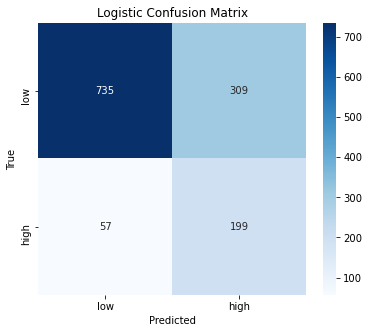

In [806]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Set class labels
classNames = ['low', 'high']

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classNames, yticklabels=classNames)

plt.title('Logistic Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

- 735 samples were correctly classified as low.
- 199 samples were correctly classified as high.
- 309 low samples were wrongly predicted as high.
- 57 high samples were wrongly predicted as low.

### 4.2.2 Decision Tree Model

#### 4.2.2.1 Model

In [780]:
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree, target_names=['low', 'high']))

              precision    recall  f1-score   support

         low       0.90      0.91      0.90      1044
        high       0.61      0.58      0.59       256

    accuracy                           0.84      1300
   macro avg       0.75      0.74      0.75      1300
weighted avg       0.84      0.84      0.84      1300



1. Precision
- 90% of predicted low wines were actually low.
- 61% of predicted high wines were actually high.
2. Recall(few FN)
- 91% of actual low wines were correctly identified.
- 58% of actual high wines were correctly identified.
3. F1 Score shows moderate performance in class high

micro avg is the overall average of all classes

In [781]:
#### 4.2.2.2 Model Evaluation

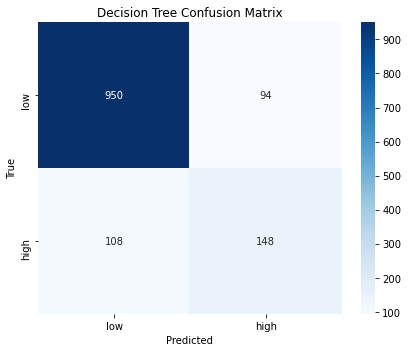

In [782]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_tree, labels=[0, 1])

# Set class labels
classNames = ['low', 'high']

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classNames, yticklabels=classNames)

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

- 950 samples were correctly classified as low.
- 148 samples were correctly classified as high.
- 108 low samples were wrongly predicted as high.
- 94 high samples were wrongly predicted as low.

### 4.2.3 ROC AUC Decision Tree and Logistic regression

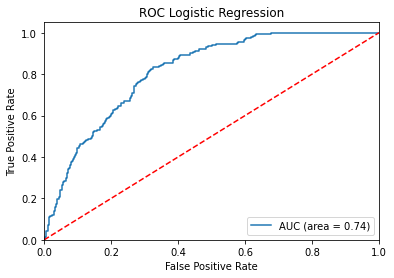

In [783]:
rocAuc = roc_auc_score(y_test, logisticreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Logistic Regression')
plt.show()

This indicates that logistic regression is better than random guessing as it can distinguish 74% of the data into the classes correctly.

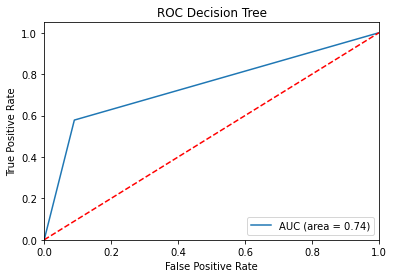

In [784]:
rocAuc = roc_auc_score(y_test, tree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Decision Tree')
plt.show()

This shows an improved ability ove gbm for the class target above. 74% indicates a better calibration on this model.

### 4.2.4 Gradient Boosting Classifier

In [814]:
gbm= GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm, labels=[0, 1], target_names=['low', 'high']))

Confusion Matrix:
[[1002   42]
 [ 157   99]]

Classification Report:
              precision    recall  f1-score   support

         low       0.86      0.96      0.91      1044
        high       0.70      0.39      0.50       256

    accuracy                           0.85      1300
   macro avg       0.78      0.67      0.70      1300
weighted avg       0.83      0.85      0.83      1300



1. Precision
- 86% of predicted low wines were actually low.
- 70% of predicted high wines were actually high.
2. Recall(few FN)
- 96% of actual low wines were correctly identified.
- 96% of actual high wines were correctly identified.
3. F1 Score shows moderate performance in class high

micro avg is the overall average of all classes

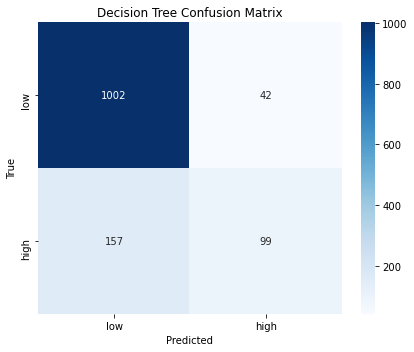

In [812]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gbm, labels=[0, 1])

# Set class labels
classNames = ['low', 'high']

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classNames, yticklabels=classNames)

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

- 1002 samples were correctly classified as low.
- 99 samples were correctly classified as high.
- 157 low samples were wrongly predicted as high.
- 42 high samples were wrongly predicted as low.

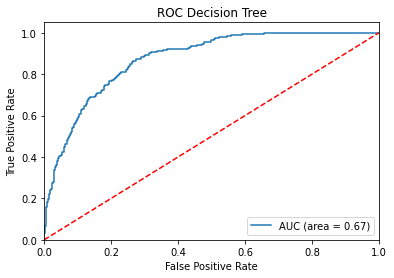

In [ ]:
rocAuc = roc_auc_score(y_test, gbm.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC gbm')
plt.show()

This indicates that gbm model is better than random guessing as it can distinguish 67% of the data into the classes correctly.

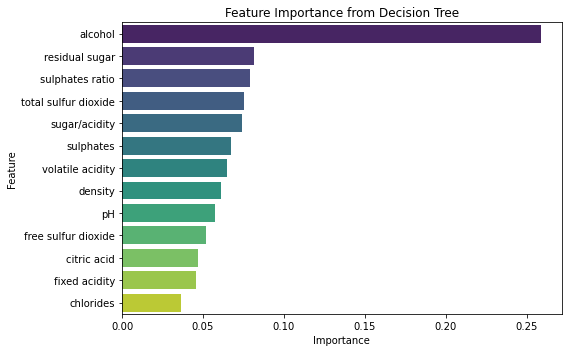

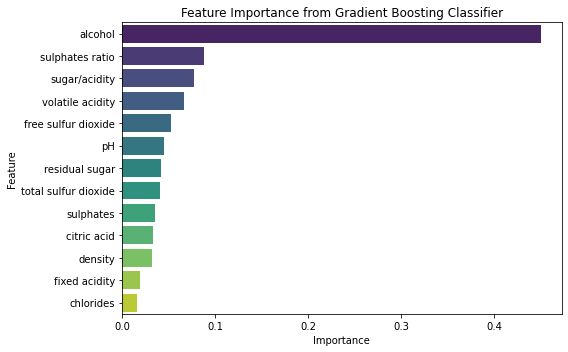

In [826]:
# Get feature importances
importances = tree.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()



# Get feature importances
importances = gbm.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Gradient Boosting Classifier')
plt.tight_layout()
plt.show()


The two images above indicate to us that `alcohol` is the feature tha affects the data quality most

# 6.RECOMMENDATION AND CONCLUSION

## 6.1 Objective Summary 
1. Chemical Properties Influencing Wine Quality
Using feature impotance and correlation matrix the ouput vividly indicatd the alcohol has the strongest correlation 
- Higher alcohol levels are positively correlated with quality.
- Volatile Acidity higher levels resulti to lower quality.
- Sulphates higher values indicate higher quality.
- Citric acid poasitive correlation.
- Density and Regular Sugar Negatively correlated with higher wine quality.

2. Creating a classification model for predicting wine quality to be either high or low quality.
- Here converted quality into binary for those >=7 high quality and <7 low quality.
- Models used Logistic regression, Decision Tree and Gradient boosting.

3. Role of Wine Type in Quality
- White wines tend to be more produced and also indicate higher quality than red wines.
- It is also indicated m=being moderate meaning it is not a primary detaminant of the quality.

4. Model performance comparison.


| Model         | Accuracy | Precision | Recall | F1 Score | AUC  |
|---------------|----------|-----------|--------|----------|------|
| Logistic      | 72%      | 0.39      | 0.78   | 0.52     | 0.72 |
| Decision Tree | 84%      | 0.61      | 0.58   | 0.59     | 0.74 |
| GBM           | 85%      | 0.70      | 0.39   | 0.50     | 0.67 |

From this table we can conclude that the Decision tree provided the best model accross all metrcs.


## 6.2 Recommendation
1. Perform external validations using other datasets 
2. One can enhance quality lables by adding a medium class.
3. Reclass or reweight to handle the class imbalance orrectly

## 6.3 Limitation
1. Dataset Imbalance on Fewer higher qality wines and more low quality wines create a class imbalance.
2. No external test data was used to test the model

## 6.3 Conclusion
1. Alcohol and volatile acidity play a crucial role in predicting wine quality.This shows that they play a great role in the quality of the data.
2. Decision tree provide the most balanced classification.
3. Wine type should be included as it has moderate effect on quality.